In [11]:
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [4]:
PREFIX = '/tank/projects/computage/benchmarking/'
datasets_config = {
                    'GSE52588':{'path':f'{PREFIX}GSE52588.pkl.gz',
                               'condition':'DS'
                               },
                    'GSE42861':{'path':f'{PREFIX}GSE42861.pkl.gz',
                               'condition':'Rheumatoid arthritis',
                               },
                    'GSE59685':{'path':f'{PREFIX}GSE59685.pkl.gz',
                               'condition':'AD',
                               },
                    'GSE80970':{'path':f'{PREFIX}GSE80970.pkl.gz',
                               'condition':'AD',
                               }, 
                    'GSE73103':{'path':f'{PREFIX}GSE73103.pkl.gz',
                               'condition':'Overweight',
                               },         
                    'GSE87640':{'path':f'{PREFIX}GSE87640.pkl.gz',
                               'condition':'IBD',
                               },   
                    'GSE87648':{'path':f'{PREFIX}GSE87648.pkl.gz',
                               'condition':'IBD',
                               },             
                    'GSE157131':{'path':f'{PREFIX}GSE157131.pkl.gz',
                               'condition':'HT',
                               },                           
                   }

8it [03:20, 25.03s/it]


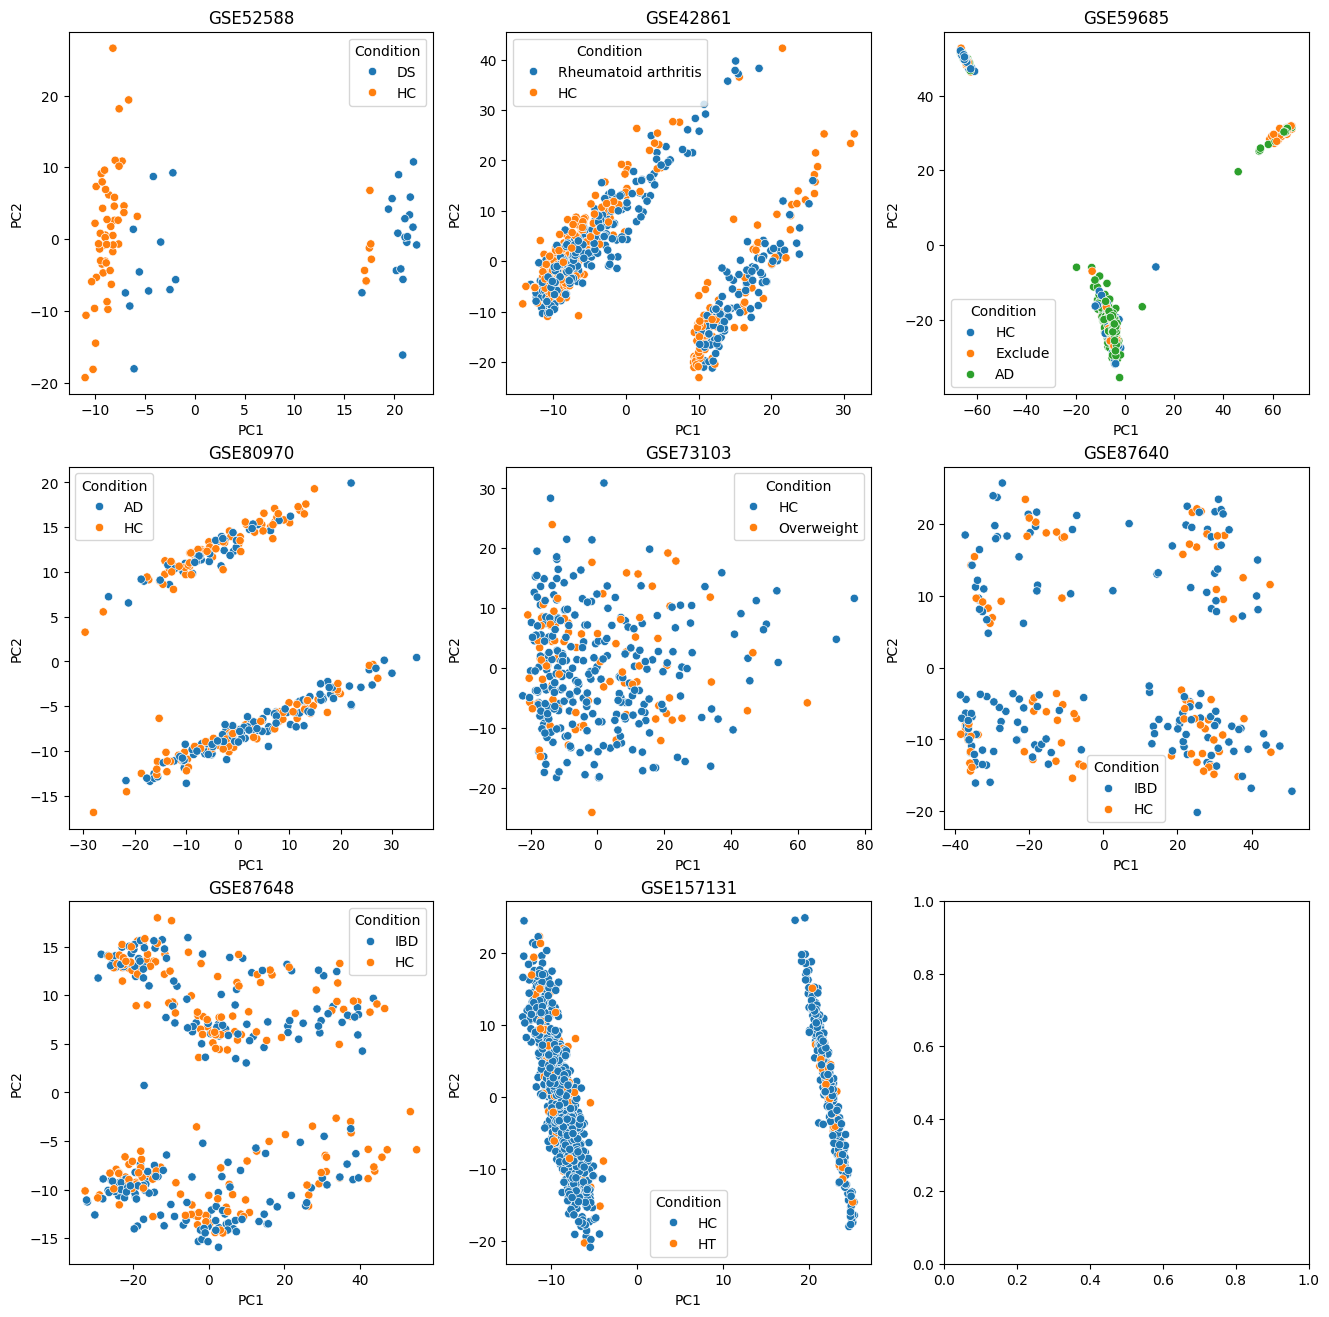

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for ax, (gse, conf) in tqdm(zip(axes.flatten(), datasets_config.items())):
    path, cond = conf.values()
    dnam, meta = pd.read_pickle(path, compression='gzip').values()
    pca = PCA(2)
    Xp = pca.fit_transform(dnam.dropna(axis=1))
    pca_data = pd.DataFrame({'PC1':Xp[:, 0], 'PC2':Xp[:, 1], 'Condition':meta['Condition'], 'Age':meta['Age']})
    sns.scatterplot(data=pca_data, x='PC1', y='PC2', style='Condition', ax=ax)
    ax.set_title(gse)


    # ax0.set_title(pca_title)
    # z1_plot = ax0.scatter(Xpa[:, 0], Xpa[:, 1], c=ya, s=50, label=legend_label_train, 
    #                     edgecolors='#333333', cmap=cbar_color_train, zorder=4)
    # z2_plot = ax0.scatter(Xpr[:, 0], Xpr[:, 1], c=yr, marker='s', s=50, label=legend_label_test, 
    #                     edgecolors='#333333', cmap=cbar_color_test, zorder=4)
    # ax0.set_xlabel(f'PCA1: {int(pvar[0]*100)}%')
    # ax0.set_ylabel(f'PCA2: {int(pvar[1]*100)}%')
    # ax0.legend(loc=pca_legend_pos)
    # leg = ax0.get_legend()
    # leg.legendHandles[0].set(edgecolor='#333333')
    # leg.legendHandles[1].set(edgecolor='#333333')
    # ax0.set_xlim(pca_xlim)
    # ax0.set_ylim(pca_ylim)

In [ ]:
# from matplotlib.gridspec import GridSpec
# import matplotlib as mpl
# import warnings
# warnings.filterwarnings('ignore')

# cbar_color_train = 'Blues'
# cbar_color_test = 'Oranges'
# color_train = '#86d2da'
# color_test = '#f9a86f'
# xa_thr = 0.05
# xr_thr = 0.05
# cbar_label_train = 'Age, months'
# cbar_label_test = 'Age, months'
# legend_label_train = 'Liver aging train, Thompson + Meer'
# legend_label_test1 = f'In vivo reprogramming test, \nChondronasiou, 2022, control'
# legend_label_test2 = f'In vivo reprogramming test, \nChondronasiou, 2022, treated'
# ks_hist_title = 'Histogram of Kolmogorov-Smirnov test\n BH-adjusted p-values for Lasso selected sites'
# pca_title = 'Aging and in vivo reprogramming datasets'
# pca_legend_pos = 'upper right'
# pca_xlim = None
# pca_ylim = [-1, 1.7]
# custom_bins = None

# if custom_bins is not None:
#     hist_bins = custom_bins 
# else:
#     hist_bins = 16

# ##############plotting starts here
# fig = plt.figure(figsize=(18, 5), constrained_layout=True)
# gs = GridSpec(2, 7, figure=fig, width_ratios=[4, 4, 0.5, 3, 3, 4, 4], wspace=0.8, hspace=0.5) 

# axcbrs = gs[:, 2].subgridspec(2, 1)
# axcb1, axcb2 = axcbrs.subplots()

# minihists = gs[:, 3:5].subgridspec(2, 2, wspace=0.3, hspace=0.5)
# minihist_subs = minihists.subplots(sharex=True)
# ax0 = fig.add_subplot(gs[:, :2])
# ax1 = minihist_subs[0,0]
# ax2 = minihist_subs[0,1]
# ax3 = minihist_subs[1,0]
# ax4 = minihist_subs[1,1]
# ax5 = fig.add_subplot(gs[:, 5:])

# #cbars
# norm_age = mpl.colors.Normalize(vmin=min(ya), vmax=max(ya))
# norm_rep = mpl.colors.Normalize(vmin=min(yr), vmax=max(yr))
# cb_age = mpl.colorbar.ColorbarBase(axcb2, cmap=cbar_color_train, norm=norm_age)
# cb_rep = mpl.colorbar.ColorbarBase(axcb1, cmap=cbar_color_test, norm=norm_rep)
# cb_age.set_label(cbar_label_train, loc='bottom')
# cb_rep.set_label(cbar_label_test, loc='bottom')
# axcb1.yaxis.set_ticks_position('left')
# axcb2.yaxis.set_ticks_position('left')

# # ax0 - PCA
# ax0.set_title(pca_title)
# sns.kdeplot(Xpa[:, 0], Xpa[:, 1], ax=ax0, color=color_train, levels=5, thresh=xa_thr)
# sns.kdeplot(Xpr[:, 0], Xpr[:, 1], ax=ax0, color=color_test, levels=5, thresh=xr_thr)
# z1_plot = ax0.scatter(Xpa[:, 0], Xpa[:, 1], c=ya, s=50, label=legend_label_train, 
#                     edgecolors='#333333', cmap=cbar_color_train, zorder=4)
# z2_plot = ax0.scatter(Xpr_control[:, 0], Xpr_control[:, 1], c=yr_control, marker='s', s=50, label=legend_label_test1, 
#                     edgecolors='#333333', cmap=cbar_color_test, zorder=4)
# z2_plot = ax0.scatter(Xpr_reprog[:, 0], Xpr_reprog[:, 1], c=yr_reprog, marker='v', s=50, label=legend_label_test2, 
#                     edgecolors='#333333', cmap=cbar_color_test, zorder=4)
# ax0.set_xlabel(f'PCA1: {int(pvar[0]*100)}%')
# ax0.set_ylabel(f'PCA2: {int(pvar[1]*100)}%')
# ax0.legend(loc=pca_legend_pos)
# leg = ax0.get_legend()
# leg.legendHandles[0].set(edgecolor='#333333')
# leg.legendHandles[1].set(edgecolor='#333333')
# ax0.set_xlim(pca_xlim)
# ax0.set_ylim(pca_ylim)

# # ax5 - overall KS pvalues hist
# ks, ksp = calculate_shift(np.array(Xa_clock), np.array(Xr_clock), metric_type='ks')
# kspa = multipletests(ksp, method='hs')[1]
# kspa = pd.DataFrame(index=Xa_clock.columns, data={'pval':kspa})

# kspaval = -np.log10(kspa['pval'].values)
# kspaval = np.where(kspaval < 100, kspaval , 100)
# pct = (kspaval < 2).sum() / kspaval.shape[0] * 100
# print(f'{round(pct, 2)}% of sites are not rejected by KS test')

# ax5.set_title(ks_hist_title)
# ax5.hist(kspaval, density=False, alpha=0.7, color='grey', bins=hist_bins)
# ax5.axvline(-np.log10(0.01), color='k', ls='--', lw=2.0)
# ax5.set_xlabel('KS test, -log10(adj.P-value)')
# ax5.set_ylabel('Number of CpGs')

# #top sites from Skin clock based on correlation with age
# selected_sites = Xa_clock.corrwith(ya).abs().sort_values(ascending=False).index[:4]

# #examples of sites + PSIs
# fig.text(0.54, 0.04, 'CpG methylation beta balue', ha='center')
# for k, ax_ in enumerate([ax1, ax2, ax3, ax4]): 
#     site_pval = kspa.loc[selected_sites[k], 'pval']
#     ax_.hist(Xa_clock[selected_sites[k]], density=True, alpha=0.8, 
#             color=color_train, 
#             bins=np.linspace(0, 1, 25), 
#             edgecolor='none')
#     ax_.hist(Xr_clock[selected_sites[k]], density=True, alpha=0.7, 
#             color=color_test, 
#             bins=np.linspace(0, 1, 25), 
#             edgecolor='none')
#     ax_.set_title(f'{selected_sites[k]},\n P-val={"{0:.2e}".format(site_pval)}')
#     ax_.set_xlim([-0.05, 1.05])

# plt.savefig('figs/A1_sup_invivo.pdf', format='pdf', bbox_inches='tight')
# plt.show()